In [1]:
'''
Written by Jordan Van Nest (jdvannest@ou.edu)
April 2022, ASTR-3190
'''
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
#Read in the data
with open('Astr511HW1data.dat.txt') as f:
    data = f.readlines()

#Store Header info for reference then remove from data
header = []
for i in np.arange(len(data[0].split())):
    header.append(f'[{i-1}]{data[0].split()[i]}')
del header[0] #Remove comment character
del data[:2] #Remove headers from data

In [3]:
#Define Functions for finding M_r and Z

#Bond et al. 2010 (ApJ,716,1)
def Metallicity(x,y):
    #x=(u-g)   y=(g-r)
    return((-13.13) + (14.09)*x + (28.04)*y + (-5.51)*x*y +
           (-5.9)*x**2 + (-58.68)*y**2 + (9.14)*y*x**2 +
           (-20.61)*x*y**2 + (0)*x**3 + (58.2)*y**3)


#Ivezic et al. 2008 (ApJ,684,287)
#Ivezic A2
def del_Mr(metallicity):
    return(4.5 - 1.11*metallicity - 0.18*metallicity**2 )
#Ivezic A7
def Mr0(g_i):
    return(-5.06 + 14.32*g_i - 12.97*g_i**2 +
           6.127*g_i**3 - 1.267*g_i**4 + 0.0967*g_i**5)
#Ivezic A3
def Mr(g_i,u_g,g_r):
    return(round(Mr0(g_i) + del_Mr(Metallicity(u_g,g_r)),3))


def Z(r,Mr): #in units of pc
    return(round(10**((r-Mr)/5+1),3))

def Vol(z):
    return((314*0.000304617*z**3)/3)

In [4]:
#Add column to data for r-mag
for lnum in np.arange(len(data)):
    line = data[lnum].split()
    u,g,r,i = [float(line[4]),float(line[5]),
               float(line[6]),float(line[7])]
    data[lnum] = data[lnum][:-1]+f'  {Mr(g-i,u-g,g-r)} \n'

In [5]:
print('Column Header Reference')
print('  '.join(header+['[17]Mr']))

Column Header Reference
[0]ra  [1]dec  [2]run  [3]Ar  [4]u  [5]g  [6]r  [7]i  [8]z  [9]uErr  [10]gErr  [11]rErr  [12]iErr  [13]zErr  [14]pmL  [15]pmB  [16]pmErr  [17]Mr


## Problem 1

In [6]:
def log_rho(data,min_color,max_color):
    #Find the stars with the appropriate colors
    #and calculate their distances
    distances = []
    for line in data:
        l = line.split()
        u,g,r,i = [float(l[4]),float(l[5]),
                   float(l[6]),float(l[7])]
        mr = float(l[-1])
        if min_color < g-r < max_color:
            distances.append(Z(r,mr)/1000)

    #Initialize arrays and counter
    #Z_bins = np.linspace(0,10*(int(max(distances)/10)+1),101)
    Z_bins = np.linspace(0,100,101)
    Z_axis = np.arange(max(Z_bins))+.5
    N,V = [np.zeros(len(Z_axis)),np.zeros(len(Z_axis))]
    i = 0

    while i<len(Z_axis):
        for d in distances:
            if Z_bins[i] < d < Z_bins[i+1]:
                N[i]+=1
        V[i] = Vol(Z_bins[i+1])-Vol(Z_bins[i])
        i+=1
    N[N==0]=np.NaN
    return(Z_axis,np.log(N/V))

In [7]:
z,rho = log_rho(data,.2,.4)

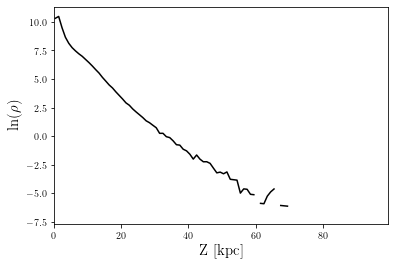

In [9]:
f,ax = plt.subplots(1,1,figsize=(6,4))
ax.set_xlim([0,max(z)])
ax.set_xlabel('Z [kpc]',fontsize=15)
ax.set_ylabel(r'ln($\rho$)',fontsize=15)

ax.plot(z,rho,c='k')

plt.show()

Discussion...

## Problem 2

In [10]:
#Repeat the process from Problem 1 for 
#new color ranges

z0,rho0 = log_rho(data,.2,.4)
z1,rho1 = log_rho(data,.4,.6)
z2,rho2 = log_rho(data,.6,.8)
z3,rho3 = log_rho(data,.8,1.)

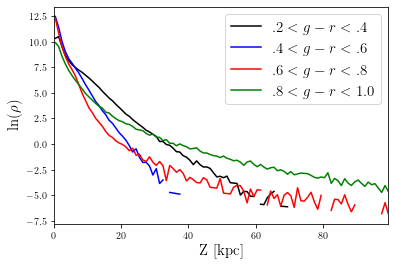

In [12]:
f,ax = plt.subplots(1,1,figsize=(6,4))
ax.set_xlim([0,max([max(z0),max(z1),max(z2),max(z3)])])
ax.set_xlabel('Z [kpc]',fontsize=15)
ax.set_ylabel(r'ln($\rho$)',fontsize=15)

ax.plot(z0,rho0,c='k',label=r'$.2<g-r<.4$')
ax.plot(z1,rho1,c='b',label=r'$.4<g-r<.6$')
ax.plot(z2,rho2,c='r',label=r'$.6<g-r<.8$')
ax.plot(z3,rho3,c='g',label=r'$.8<g-r<1.0$')

ax.legend(loc='upper right',prop={'size':15})
plt.show()

Discussion...

## Problem 3

In [13]:
#Find the stars with the appropriate colors
#and calculate their distances
d_low,d_high = [[],[]]
for line in data:
    l = line.split()
    u,g,r,i = [float(l[4]),float(l[5]),
               float(l[6]),float(l[7])]
    mr = float(l[-1])
    if .2 < g-r < .4:
        if Metallicity(u-g,g-r)<-1.0:
            d_low.append(Z(r,mr)/1000)
        else:
            d_high.append(Z(r,mr)/1000)

#Initialize arrays and counter
#Z_bins = np.linspace(0,10*(int(max(distances)/10)+1),101)
Z_bins = np.linspace(0,100,101)
Z_axis = np.arange(max(Z_bins))+.5
V = np.zeros(len(Z_axis))
N_low,N_high = [np.zeros(len(Z_axis)),np.zeros(len(Z_axis))]
i = 0

while i<len(Z_axis):
    for d in d_low:
        if Z_bins[i] < d < Z_bins[i+1]:
            N_low[i]+=1
    for d in d_high:
        if Z_bins[i] < d < Z_bins[i+1]:
            N_high[i]+=1
    V[i] = Vol(Z_bins[i+1])-Vol(Z_bins[i])
    i+=1
N_low[N_low==0]=np.NaN
N_high[N_high==0]=np.NaN

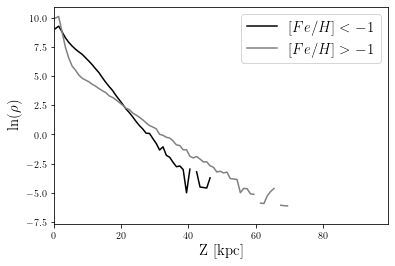

In [14]:
f,ax = plt.subplots(1,1,figsize=(6,4))
ax.set_xlim([0,max(Z_axis)])
ax.set_xlabel('Z [kpc]',fontsize=15)
ax.set_ylabel(r'ln($\rho$)',fontsize=15)

ax.plot(Z_axis,np.log(N_low/V),c='k',label=r'$[Fe/H]<-1$')
ax.plot(Z_axis,np.log(N_high/V),c='.5',label=r'$[Fe/H]>-1$')

ax.legend(loc='upper right',prop={'size':15})
plt.show()

Discussion...

## Problem 4

In [15]:
Mr_low,Mr_high,Mr_tot = [[],[],[]]
r_low,r_high,r_tot = [[],[],[]]
for line in data:
    l = line.split()
    u,g,r,i = [float(l[4]),float(l[5]),
               float(l[6]),float(l[7])]
    mr = float(l[-1])
    if .2 < g-r < .4:
        Mr_tot.append(mr)
        r_tot.append(r)
        if Metallicity(u-g,g-r)<-1.0:
            Mr_low.append(mr)
            r_low.append(r)
        else:
            Mr_high.append(mr)
            r_high.append(r)

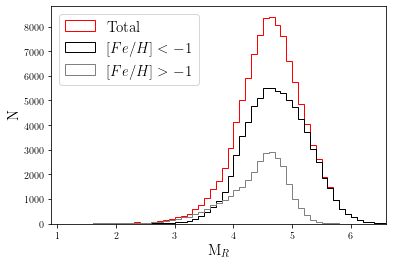

In [16]:
Mr_min = min([min(Mr_low),min(Mr_high)])
Mr_max = max([max(Mr_low),max(Mr_high)])
Mr_bins = np.arange((int(Mr_min*10)-1)/10,(int(Mr_max*10)+1)/10,.1)

f,ax = plt.subplots(1,1,figsize=(6,4))
ax.set_xlim([min(Mr_bins),max(Mr_bins)])
ax.set_xlabel(r'M$_R$',fontsize=15)
ax.set_ylabel('N',fontsize=15)

ax.hist(Mr_tot,Mr_bins,color='r',histtype='step',label='Total')
ax.hist(Mr_low,Mr_bins,color='k',histtype='step',label=r'$[Fe/H]<-1$')
ax.hist(Mr_high,Mr_bins,color='.5',histtype='step',label=r'$[Fe/H]>-1$')

ax.legend(loc='upper left',prop={'size':15})
plt.show()

In [17]:
#Nicole seems to have plotted the SDSS r instead of the 
#M_r we calculated at the start?

#r_min = min([min(r_low),min(r_high)])
#r_max = max([max(r_low),max(r_high)])
#r_bins = np.arange((int(r_min*10)-1)/10,(int(r_max*10)+1)/10,.1)
#
#f,ax = plt.subplots(1,1,figsize=(6,4))
#ax.set_xlim([min(r_bins),max(r_bins)])
#ax.set_xlabel('r [SDSS Photometry]',fontsize=15)
#ax.set_ylabel('N',fontsize=15)
#
#ax.hist(r_tot,r_bins,color='r',histtype='step',label='Total')
#ax.hist(r_low,r_bins,color='k',histtype='step',label=r'$[Fe/H]<-1$')
#ax.hist(r_high,r_bins,color='.5',histtype='step',label=r'$[Fe/H]>-1$')
#
#ax.legend(loc='upper left',prop={'size':15})
#plt.show()

Discussion...

## Problem 5